In [1]:
# Import the required functions from your lunar library
from lunar.find_contours import find_contours_from_videos
from lunar.plot_contours import plot_contours
from lunar.identify_glare import process_large_file
from lunar.label_tanx import analyze_contours
from lunar import match_cameras
from lunar import plot_matched
from lunar import smooth_contours
from lunar.plot_glare_contours import plot_glare_contours
from lunar.identify_glare import clip_ends
from lunar.identify_glare import manual_mark_glare



In [2]:
# Define parameters for processing first video
video_pattern = '/Users/oakley/Downloads/out_*.mp4'
output_suffix = '23Jul2024.tsv'
black_threshold = 200
min_area = 15
max_area = 1000
brightness_threshold = 100 #used to decide if lights were on
threads = 2  


# Process video and generate contours file
# This takes several hours to process
# Change to code to execute if necessary

find_contours_from_videos(
    video_pattern=video_pattern,
    black=black_threshold,
    minArea=min_area,
    maxArea=max_area,
    brightnessThreshold=brightness_threshold,
    threads=threads,
    outfile=output_suffix
)


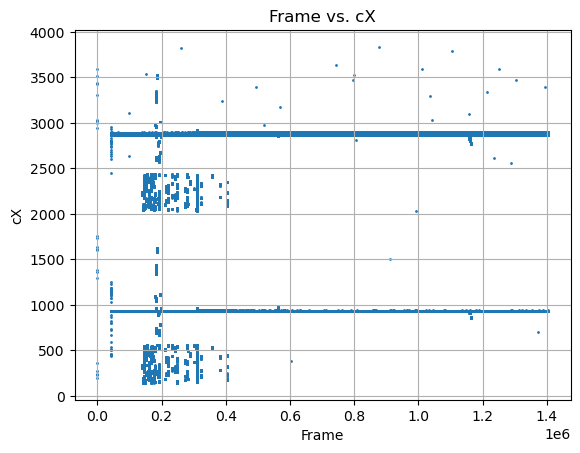

In [3]:
# Plot the contours data
output_file = 'contours_' + output_suffix
plot_contours(output_file)

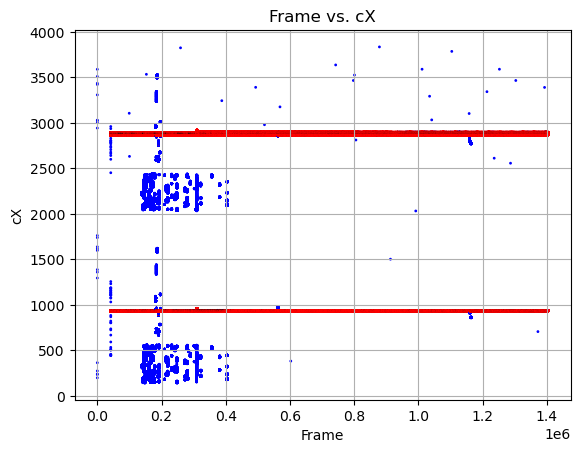

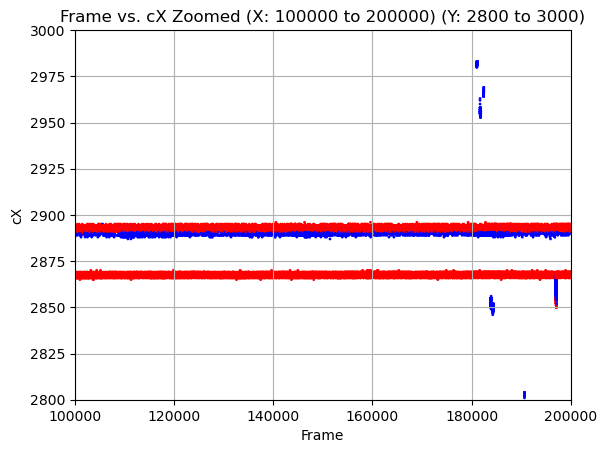

In [7]:
# Identify glare in contour file
process_large_file(
    input_file='contours_' + output_suffix,
    output_file='glare_' + output_suffix,
    min_cluster_size=4000,
    eps=0.3, 
    min_samples=50,
    chunksize=100000
)
# Plot the glare-processed results
plot_contours('glare_' + output_suffix, glare=True, zoomx=(100000,200000), zoomy=(2800,3000))  # Change last to True to color by cluster

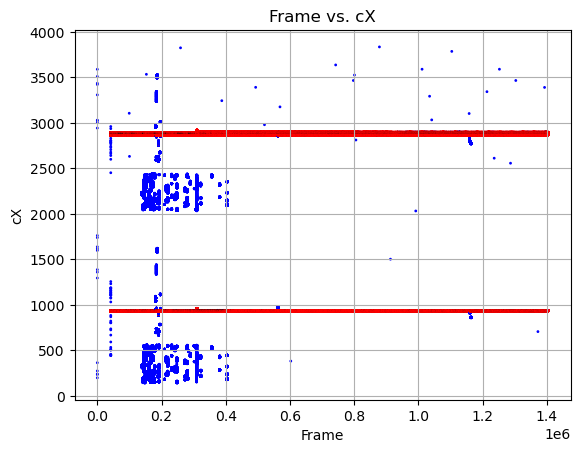

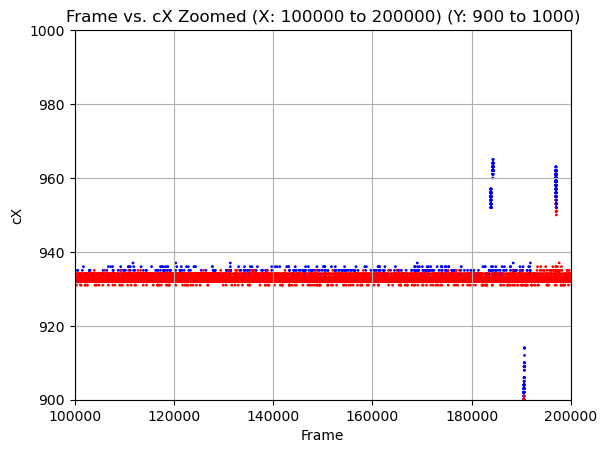

In [4]:
plot_contours('glare_' + output_suffix, glare=True, zoomx=(100000,200000), zoomy=(900,1000))

In [22]:
manual_mark_glare(
    input_file = 'glare_' + output_suffix,
    output_file = 'vglare_' + output_suffix,
    low_clip = 50000,
    hi_clip = 1450000,
    hmark=[930, 940, 2867, 2900] #horizontal marks of glare
    
)


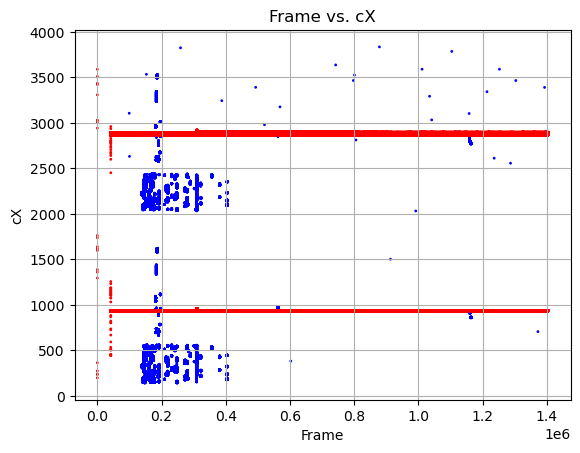

In [25]:
# Plot the glare-processed results -- Zoom in to see if all glare is being identified
plot_contours('vglare_' + output_suffix, glare=True)  # Change last to True to color by cluster

In [26]:
# Analyze the contours to label tanks
tank_boundaries = [139, 596, 1162, 1674, 2020, 2465, 3052, 3589]
analyze_contours('vglare_' + output_suffix, tank_boundaries)

Removed 3499218 rows labeled as glare.
Analysis complete. Results saved to analyzed_vglare_23Jul2024.tsv


,frame,cX,cY,area,minI,maxI,meanI,video,glare,camera,tank,cXtank
51463,61147,2867.0,503.0,70.0,203.0,255.0,239.402299,/home/local/ADS/oakley/labdata/users/McKinley/...,no,right,right_tank2,402.0
76523,70514,2867.0,504.0,77.5,201.0,255.0,241.627660,/home/local/ADS/oakley/labdata/users/McKinley/...,no,right,right_tank2,402.0
76847,70627,2867.0,502.0,69.0,201.0,255.0,239.564706,/home/local/ADS/oakley/labdata/users/McKinley/...,no,right,right_tank2,402.0
80080,71766,2867.0,502.0,76.5,202.0,255.0,238.369565,/home/local/ADS/oakley/labdata/users/McKinley/...,no,right,right_tank2,402.0
143327,94761,2867.0,503.0,66.5,201.0,255.0,241.280488,/home/local/ADS/oakley/labdata/users/McKinley/...,no,right,right_tank2,402.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3262089,1286553,2558.0,1079.0,16.5,201.0,228.0,210.703704,/home/local/ADS/oakley/labdata/users/McKinley/...,no,right,right_tank2,93.0
3303547,1302938,3467.0,1078.0,16.5,201.0,222.0,212.307692,/home/local/ADS/oakley/labdata/users/McKinley/...,no,right,right_tank3,415.0
3476223,1371900,707.0,5.0,16.0,202.0,234.0,212.615385,/home/local/ADS/oakley/labdata/users/McKinley/...,no,left,left_tank2,111.0
3512921,1386841,940.0,421.0,16.0,201.0,246.0,224.708333,/home/local/ADS/oakley/labdata/users/McKinley/...,no,left,left_tank2,344.0


In [27]:
match_cameras(
    'analyzed_vglare_' + output_suffix,  # Input file
    'matched_' + output_suffix,         # Output file
    distance_x=200,                     # Maximum allowed difference for cX
    distance_y=100                      # Maximum allowed difference for cY
)


Updated data has been written to matched_23Jul2024.tsv


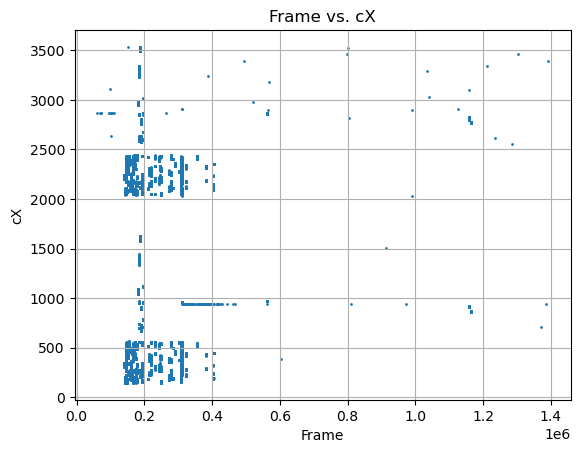

In [30]:
plot_contours('matched_' + output_suffix)

Smoothed data saved to smooth_23Jul2024.tsv
Plot saved to 23Jul2024.png


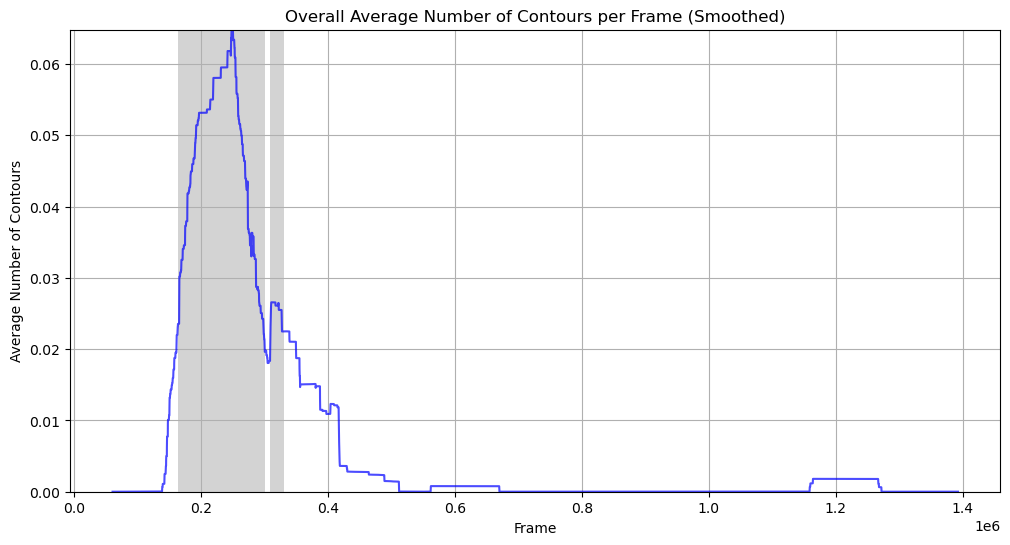

In [29]:
smooth_contours(
    input_file='matched_' + output_suffix,
    outfile_suffix = output_suffix,
    window=108000,
    pad=True,
     date = "July 23, 2024" #Pads beginning with zeros to not get edge artifact
)